In [137]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from warnings import filterwarnings
filterwarnings('ignore')

In [68]:
df=pd.read_csv("heart.csv") ## veri setini okuduk 

In [69]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
df.isnull().sum() ## eksik değişken kontrolü 

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [71]:
df.shape[0] ## satır sayısı 

303

In [72]:
df.shape[1] ## sütun sayısı 

14

In [73]:
df.info() ## veri seti hakında bilgiler 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [74]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [75]:
df["output"].value_counts() ## 1 ve 0 çıktılarının kaçar tane olduğuna ulaşılması

1    165
0    138
Name: output, dtype: int64

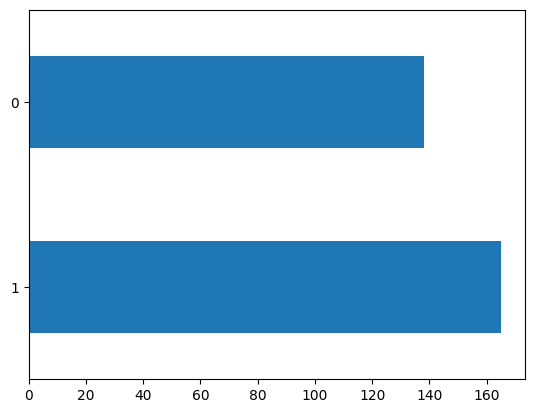

In [106]:
df["output"].value_counts().plot.barh();

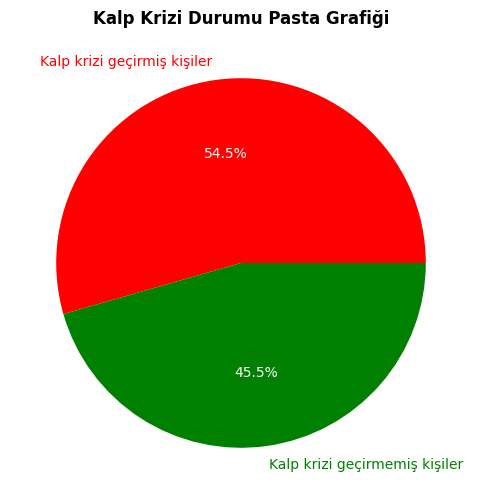

In [208]:
plt.figure(figsize=(6, 6))
labels = 'Kalp krizi geçirmiş kişiler', 'Kalp krizi geçirmemiş kişiler'
patches, texts, autotexts = plt.pie(df['output'].value_counts(), colors=['red', 'green'], autopct='%.1f%%', radius=1, labels=['Kalp krizi geçirmiş kişiler', 'Kalp krizi geçirmemiş kişiler'], )
texts[0].set_color('red')
texts[1].set_color('green')
[autotext.set_color('white') for autotext in autotexts]
plt.title('Kalp Krizi Durumu Pasta Grafiği', color ='black', weight= 'bold')
plt.show()

Veri Ön İşleme ve Görselleştirme

In [76]:
for i in list(df.columns):
    print("{} --- {}".format(i,df[i].value_counts().shape[0]) )  ## her değişkenin kaç farklı değer içerdiğine ulaşıp kategorik değişkenlere ulaşılması


age --- 41
sex --- 2
cp --- 4
trtbps --- 49
chol --- 152
fbs --- 2
restecg --- 3
thalachh --- 91
exng --- 2
oldpeak --- 40
slp --- 3
caa --- 5
thall --- 4
output --- 2


In [77]:
kategorik=["sex","cp","fbs","restecg","exng","slp","caa","thall","output"]

In [78]:
df_kategorik=df.loc[:,kategorik]

In [79]:
df_kategorik

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0


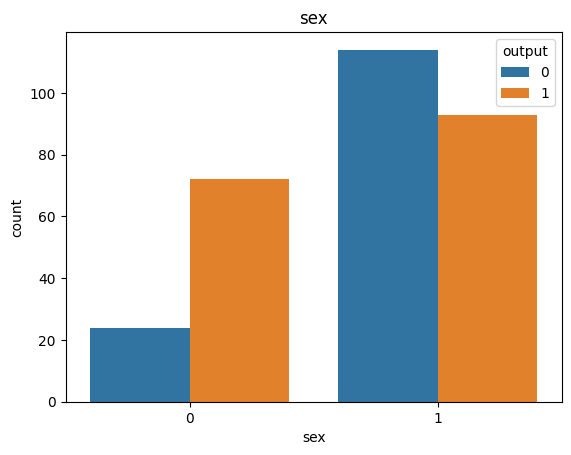

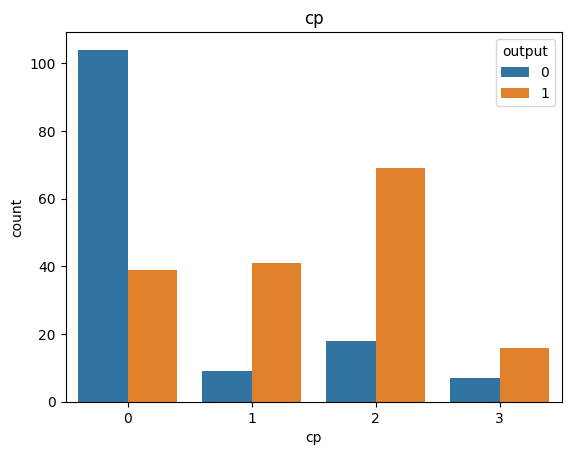

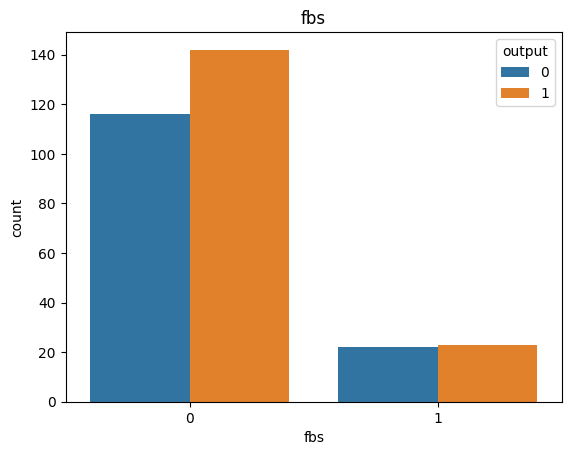

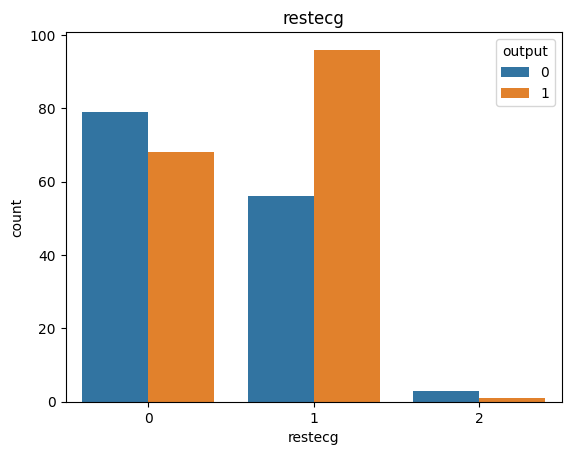

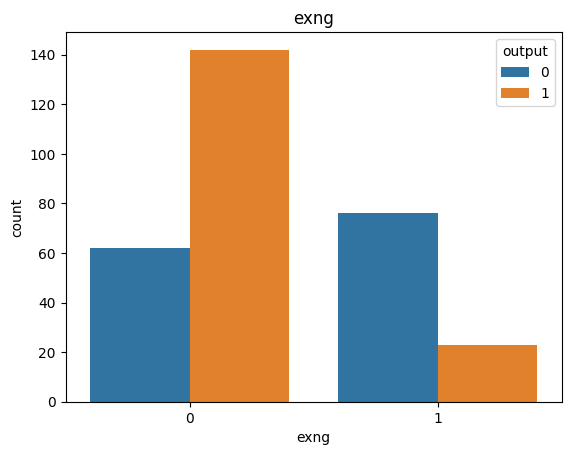

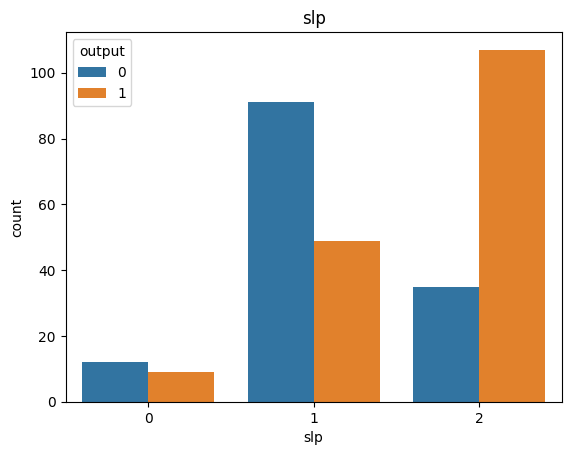

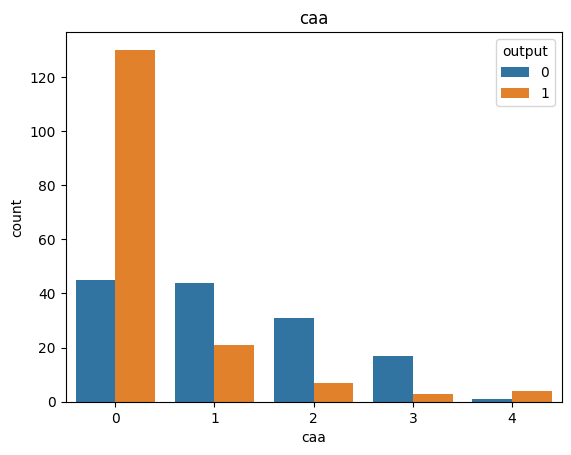

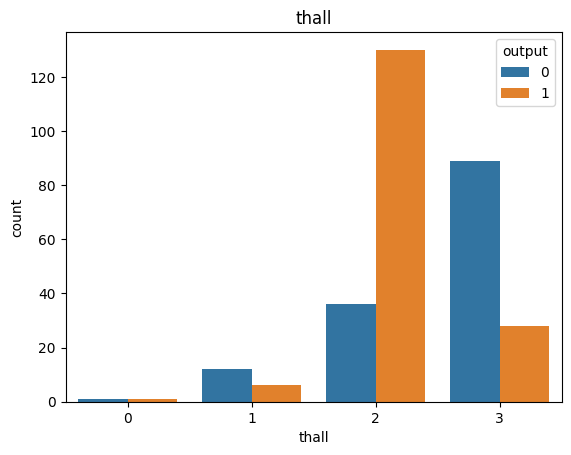

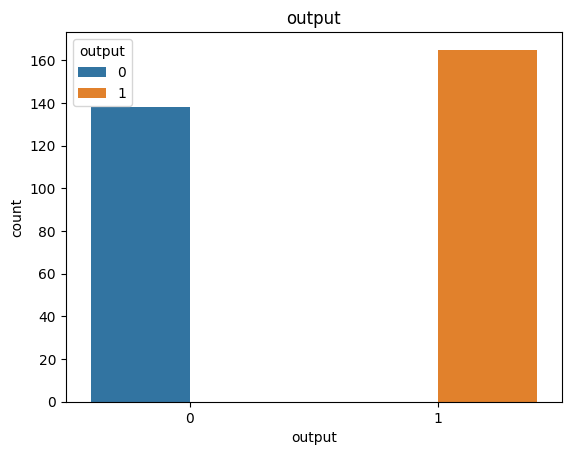

In [80]:
for i in df_kategorik:
    plt.figure()                                            ##  kategorik değişkenlerin çıktıya olan gözleminin görselleştirilmesi 
    sns.countplot(x=i,data=df_kategorik,hue="output")
    plt.title(i)


In [81]:
for i in list(df.columns):
    print("{} --- {}".format(i,df[i].value_counts().shape[0]) )


age --- 41
sex --- 2
cp --- 4
trtbps --- 49
chol --- 152
fbs --- 2
restecg --- 3
thalachh --- 91
exng --- 2
oldpeak --- 40
slp --- 3
caa --- 5
thall --- 4
output --- 2


In [82]:
sayisal=["age","trtbps","chol","thalachh","oldpeak","output"]

In [83]:
df_sayisal=df.loc[:,sayisal]

In [84]:
df_sayisal

,age,trtbps,chol,thalachh,oldpeak,output
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,0
301,57,130,131,115,1.2,0


In [85]:
df_sayisal.describe().T            ## sayısıal değişkenlerin matematiksel istatistikleri 

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
output,303.0,0.544554,0.498835,0.0,0.0,1.0,1.0,1.0


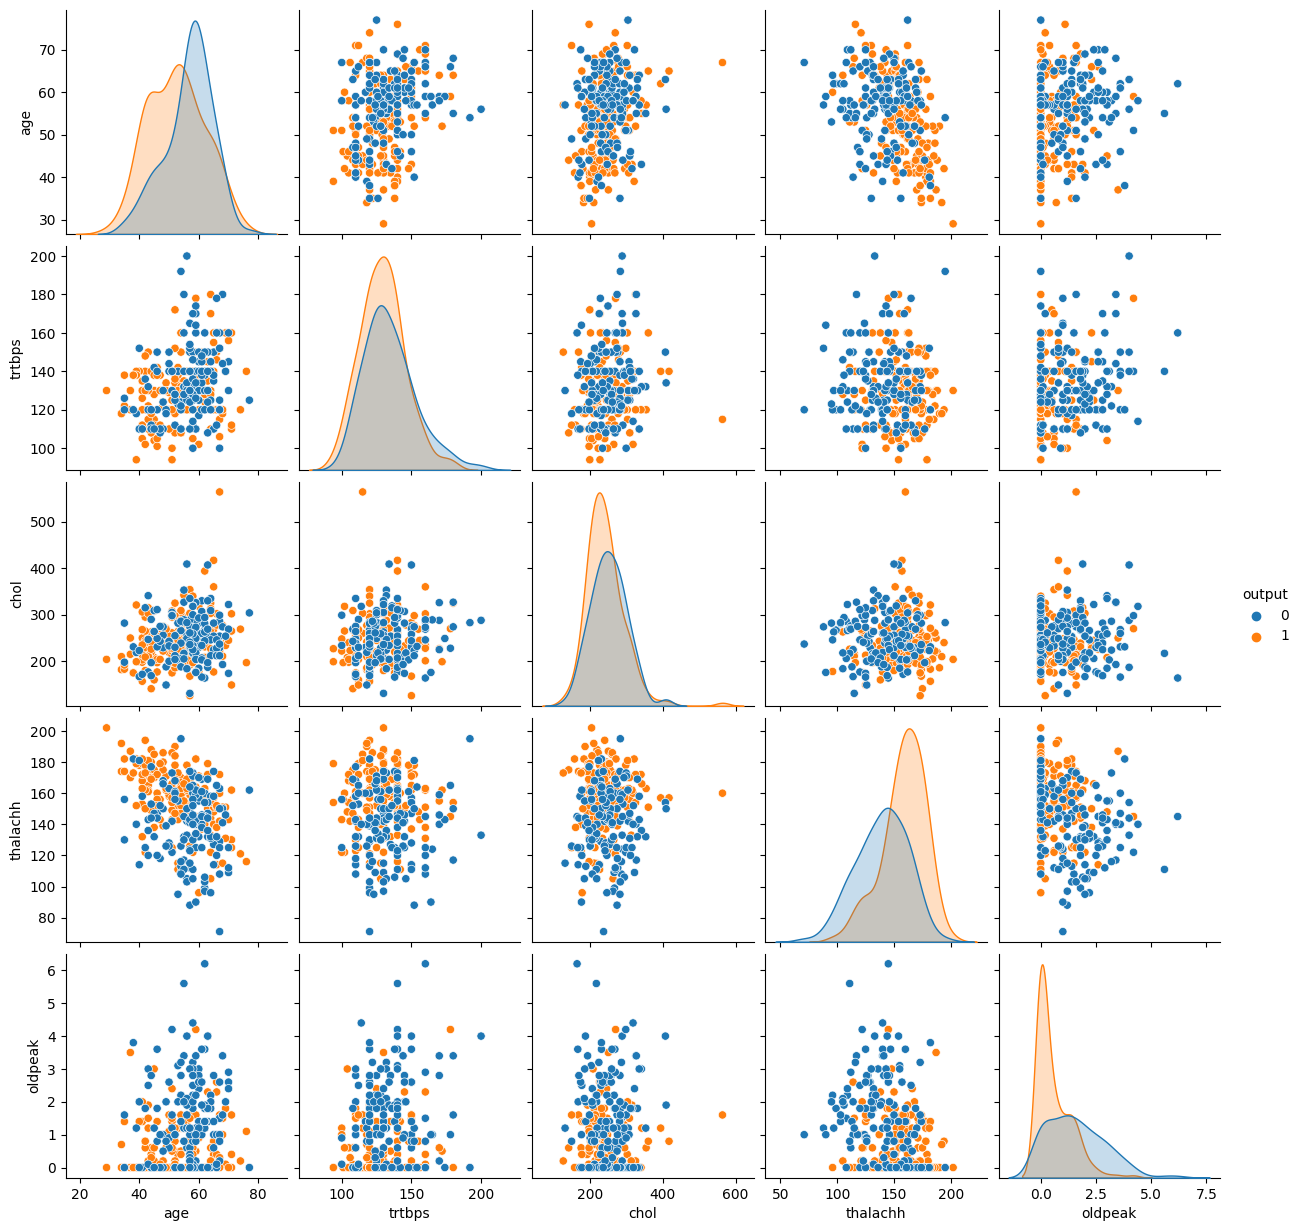

In [86]:
sns.pairplot(df_sayisal,hue="output",diag_kind="kde");    ##  sayısal değişkenlerin çıktıya olan gözleminin görselleştirilmesi
plt.show();

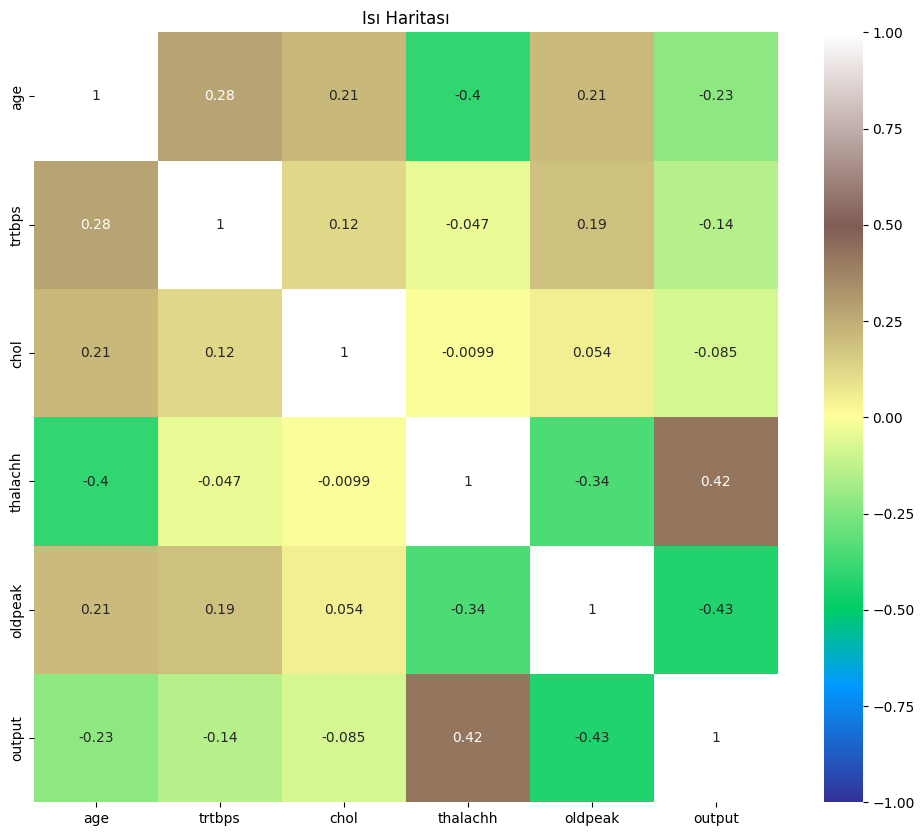

In [209]:
korelasyon = df_sayisal.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(korelasyon, annot=True, vmin=-1.0, cmap="terrain")          ## ısı haritası 
plt.title("Isı Haritası")
plt.show()
     

In [89]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [90]:
data=df.copy

In [91]:
df=pd.get_dummies(df,columns=kategorik[:-1],drop_first=True)

In [92]:
df.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [95]:
X=df.drop(["output"],axis=1)
y=df[["output"]]

In [96]:
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [97]:
y.head()

,output
0,1
1,1
2,1
3,1
4,1


Model

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=37)

In [100]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(61, 22)
(61, 1)
(242, 22)
(242, 1)


In [101]:
log_reg=LogisticRegression()

In [105]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [108]:
log_reg.intercept_ #### sabit değişken katsayı değeri

array([-0.02503333])

In [109]:
log_reg.coef_ ## ## bağımsız değişkenler katsayı değerleri

array([[ 1.68521685e-02, -1.72759131e-02, -1.44204887e-03,
         2.11879328e-02, -5.99424616e-01, -1.08136112e+00,
         4.74285864e-01,  1.61338275e+00,  8.85564024e-01,
         1.03070061e-01,  5.31273430e-01,  2.81213108e-02,
        -8.90369257e-01, -3.87097332e-01,  2.55198317e-01,
        -1.54794485e+00, -1.32910650e+00, -8.95220582e-01,
         1.27188450e-01,  1.14500975e-01,  6.28635591e-01,
        -7.13788499e-01]])

In [158]:
y_pred = log_reg.predict(X_test)

In [159]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [160]:
print("Doğruluk Oranı:" + " % "+ str(round(100 *  accuracy_score(y_test, y_pred),2))) ## doğru sınıflandırma oranı 

Doğruluk Oranı: % 86.89


In [161]:
log_reg.predict_proba(X_test)[:,0:2]

array([[0.6863009 , 0.3136991 ],
       [0.02369533, 0.97630467],
       [0.40740675, 0.59259325],
       [0.07817323, 0.92182677],
       [0.77147132, 0.22852868],
       [0.06072708, 0.93927292],
       [0.05338775, 0.94661225],
       [0.06703948, 0.93296052],
       [0.95256363, 0.04743637],
       [0.02141734, 0.97858266],
       [0.02093165, 0.97906835],
       [0.092029  , 0.907971  ],
       [0.03258108, 0.96741892],
       [0.33398159, 0.66601841],
       [0.98668663, 0.01331337],
       [0.94581969, 0.05418031],
       [0.06880454, 0.93119546],
       [0.20676813, 0.79323187],
       [0.7635293 , 0.2364707 ],
       [0.99350095, 0.00649905],
       [0.52414653, 0.47585347],
       [0.24486081, 0.75513919],
       [0.95169688, 0.04830312],
       [0.2508255 , 0.7491745 ],
       [0.70798808, 0.29201192],
       [0.98571324, 0.01428676],
       [0.22048282, 0.77951718],
       [0.99228537, 0.00771463],
       [0.93335028, 0.06664972],
       [0.94532591, 0.05467409],
       [0.

In [162]:
y_probs=log_reg.predict_proba(X_test)
y_probs = y_probs[:,1]

In [163]:
y_probs ## 1'e ait olasılıklar

array([0.3136991 , 0.97630467, 0.59259325, 0.92182677, 0.22852868,
       0.93927292, 0.94661225, 0.93296052, 0.04743637, 0.97858266,
       0.97906835, 0.907971  , 0.96741892, 0.66601841, 0.01331337,
       0.05418031, 0.93119546, 0.79323187, 0.2364707 , 0.00649905,
       0.47585347, 0.75513919, 0.04830312, 0.7491745 , 0.29201192,
       0.01428676, 0.77951718, 0.00771463, 0.06664972, 0.05467409,
       0.39272276, 0.91269965, 0.21047664, 0.98386122, 0.97431923,
       0.74707942, 0.94287325, 0.0088372 , 0.00851224, 0.9781338 ,
       0.03259967, 0.25876767, 0.01985163, 0.84443168, 0.03320559,
       0.9763104 , 0.3828383 , 0.9128498 , 0.57749018, 0.00671287,
       0.93912251, 0.94076407, 0.23878205, 0.87768217, 0.93967563,
       0.02515141, 0.02792039, 0.29156228, 0.03955442, 0.92275303,
       0.82465417])

In [164]:
y_pred = [1 if i > 0.7 else 0 for i in y_probs] ## dönüştürme işlemi--- oran 0.7'den büyükkse kalp krizi riskli tanısı koyulacak 

In [165]:
y_pred

[0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1]

In [166]:
print("Doğruluk Oranı:" + " % "+ str(round(100 *  accuracy_score(y_test, y_pred),2))) ## modelin son halinin doğru sınıflandırma oranı 

Doğruluk Oranı: % 85.25


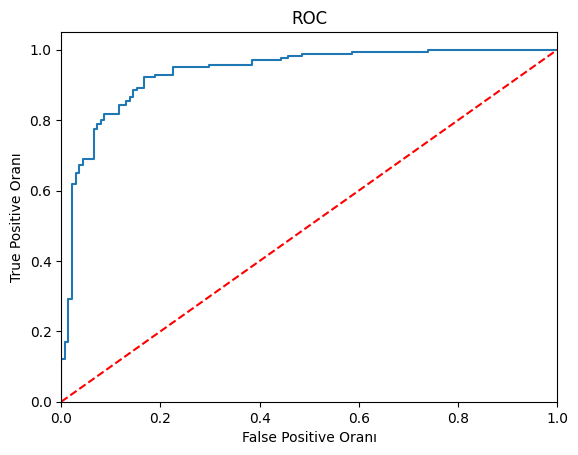

In [167]:
logit_roc_auc = roc_auc_score(y, log_reg.predict(X))

fpr, tpr, thresholds = roc_curve(y, log_reg.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()